1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 21ms/step


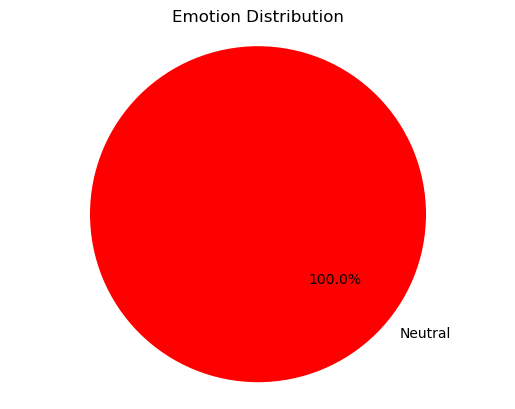

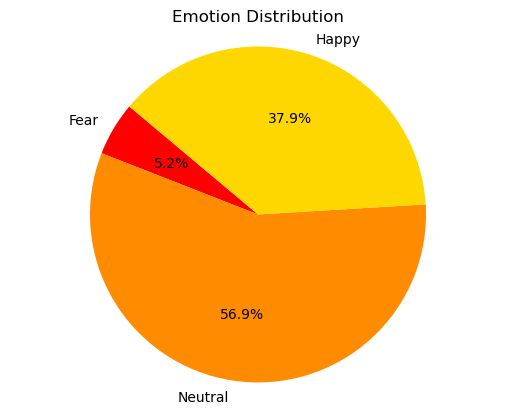

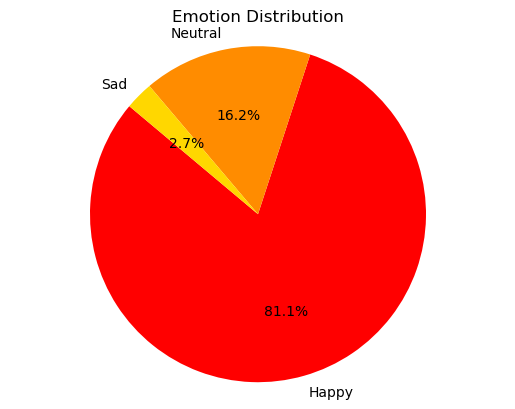

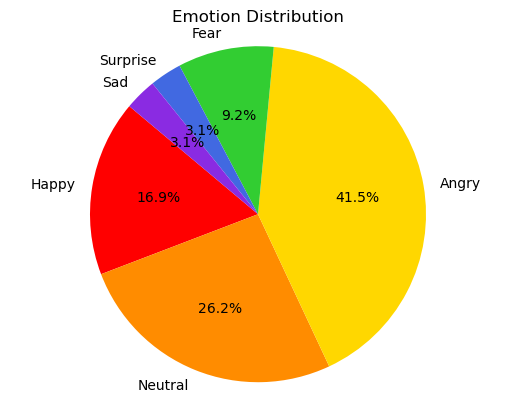

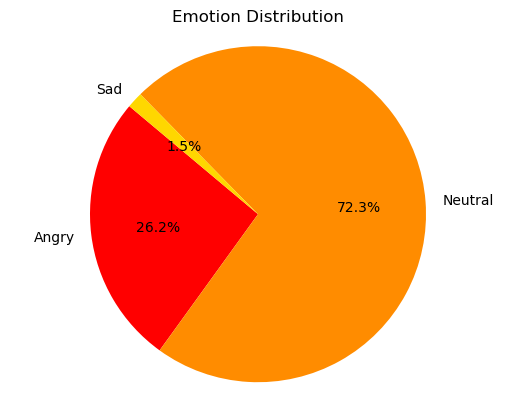

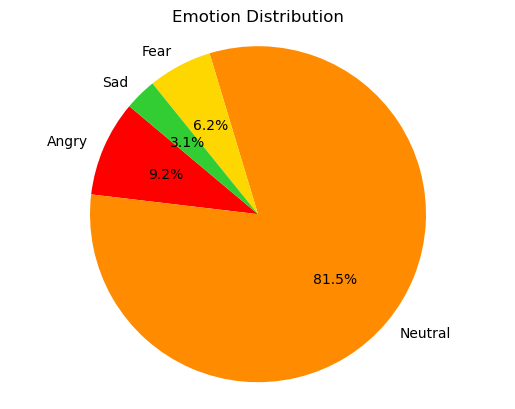

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import time
from collections import Counter
import matplotlib.pyplot as plt

emotion_model = load_model('model.h5')
emotion_model.load_weights('weights.h5')

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Create a list to store detected emotions
detected_emotions = []

# Create a list to store the majority emotions
majority_emotions = []

# Variables for emotion calculation
start_time = time.time()
emotions_window = 5  # Calculate emotions over 5 seconds
display_interval = 5  # Display the majority emotion every 5 seconds

# Flag to control text display
show_text = False

# Function to detect and recognize emotions
def detect_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

        roi = roi_gray[np.newaxis, :, :, np.newaxis]
        prediction = emotion_model.predict(roi)
        emotion = emotions[np.argmax(prediction)]

        detected_emotions.append(emotion)

    return frame

# Open the webcam and run emotion detection
cap = cv2.VideoCapture(0)

# Create a function to plot a pie chart of emotions
def plot_pie_chart(emotion_counts):
    if not emotion_counts:
        return

    labels, counts = zip(*emotion_counts.items())
    colors = ['red', 'darkorange', 'gold', 'limegreen', 'royalblue', 'blueviolet', 'lightgray']
    plt.figure()
    plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title("Emotion Distribution")
    plt.savefig("emotion.png")
    image = cv2.imread("emotion.png")
    cv2.imshow("Frame", image)
    #plt.show()  # Display the pie chart in a separate window

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = detect_emotion(frame)

    current_time = time.time()
    elapsed_time = current_time - start_time

    # Display the majority emotion every 5 seconds
    if elapsed_time >= display_interval:
        # Calculate the majority emotion if there are detected emotions
        if detected_emotions:
            emotion_counts = Counter(detected_emotions)
            majority_emotion = emotion_counts.most_common(1)[0][0]

            detected_emotions = []  # Reset the emotion list
            start_time = current_time  # Reset the start time

            # Store the majority emotion
            majority_emotions.append(majority_emotion)

            # Set the flag to display text
            show_text = True

            # Plot the pie chart
            plot_pie_chart(emotion_counts)

    if show_text:
        # Display the majority emotion as text on the frame
        cv2.putText(frame, f"Majority Emotion: {majority_emotion}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv2.imshow('Emotion Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 187ms/step


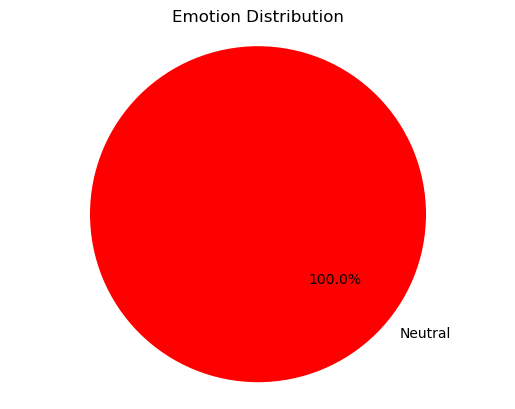

1/1 [==============================] - 0s 19ms/step


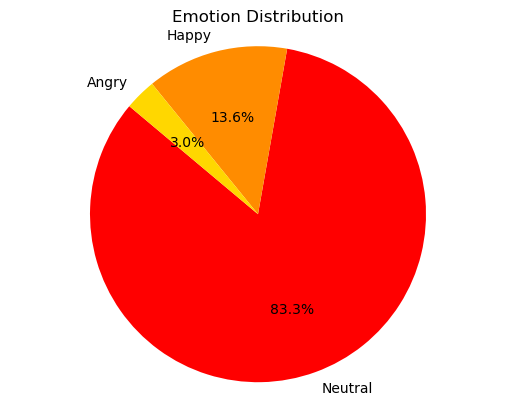

1/1 [==============================] - 0s 18ms/step


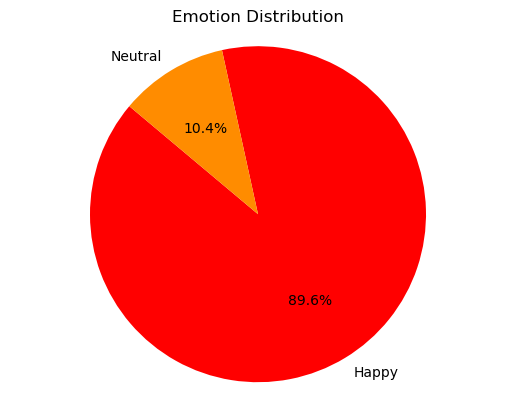

1/1 [==============================] - 0s 24ms/step


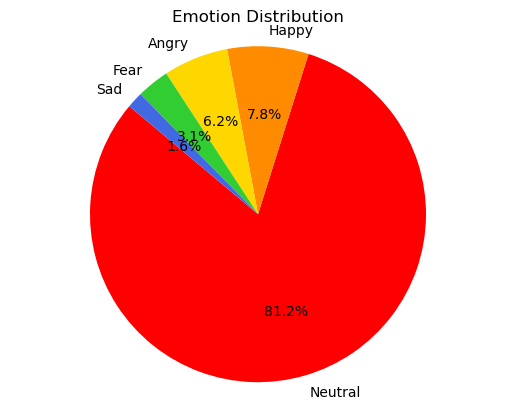

1/1 [==============================] - 0s 20ms/step


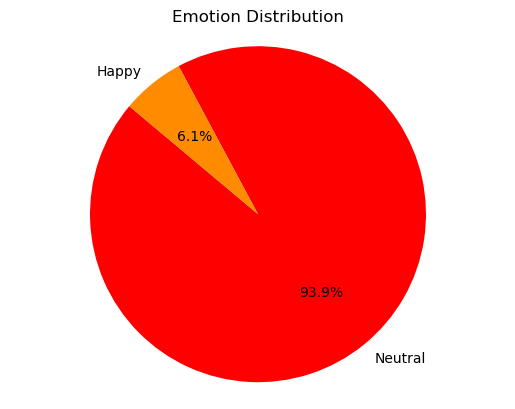

1/1 [==============================] - 0s 24ms/step


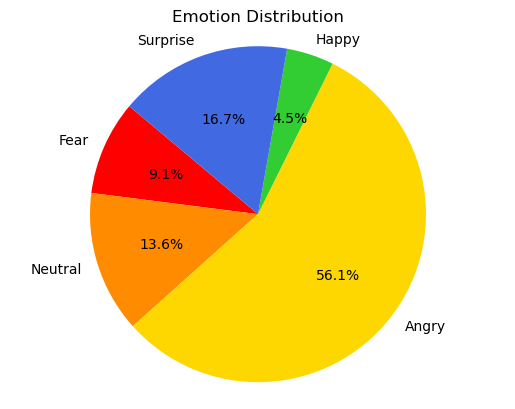

1/1 [==============================] - 0s 21ms/step


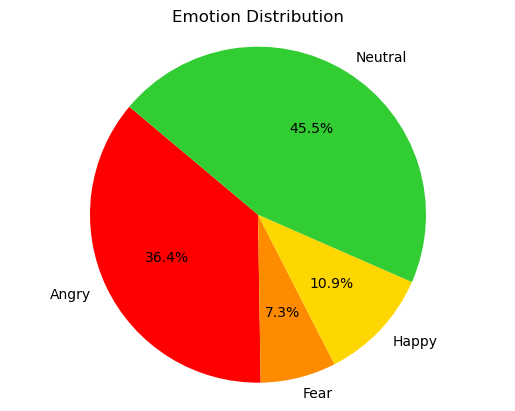

1/1 [==============================] - 0s 20ms/step


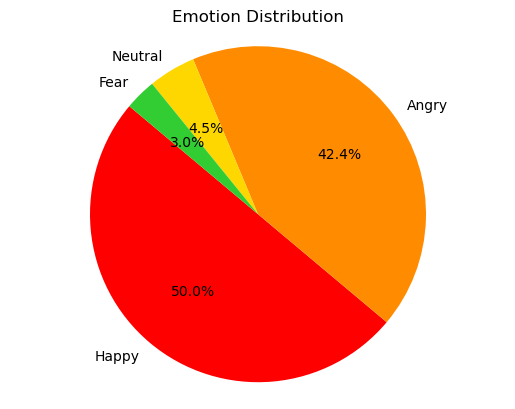

1/1 [==============================] - 0s 21ms/step


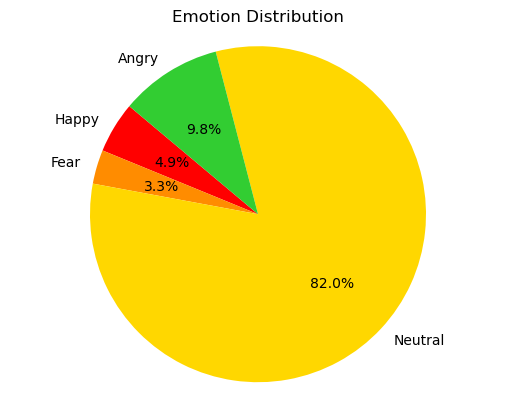

1/1 [==============================] - 0s 32ms/step


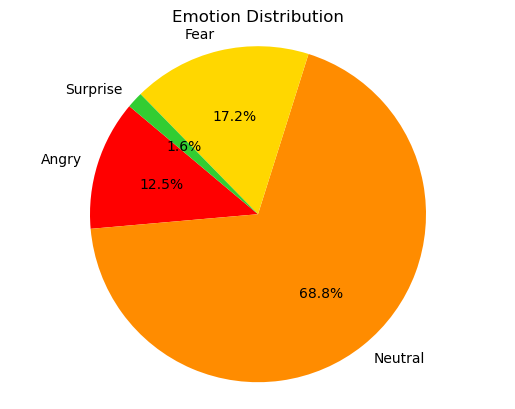

1/1 [==============================] - 0s 29ms/step


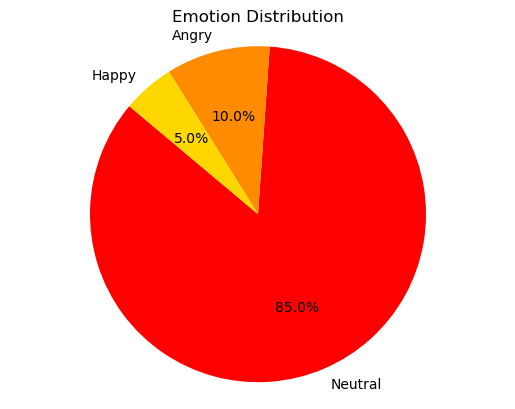

1/1 [==============================] - 0s 21ms/step


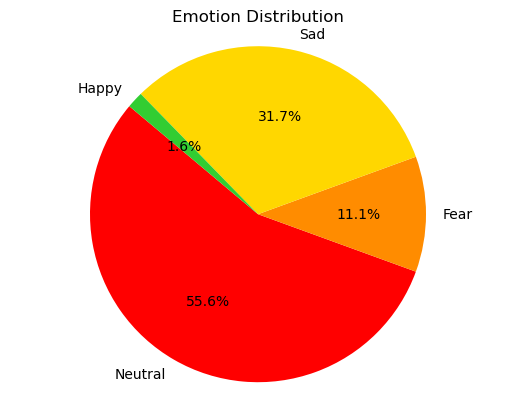

1/1 [==============================] - 0s 21ms/step


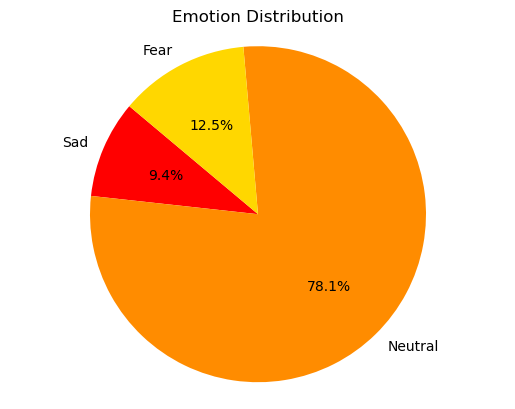

1/1 [==============================] - 0s 15ms/step


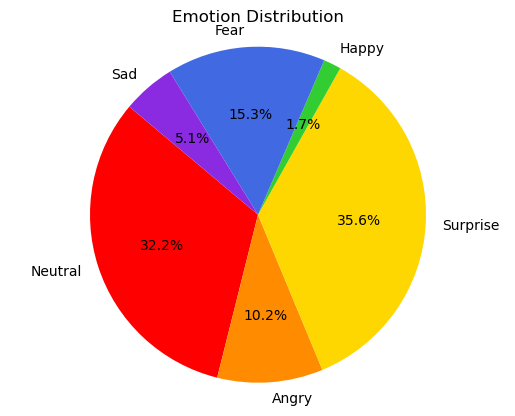

1/1 [==============================] - 0s 23ms/step


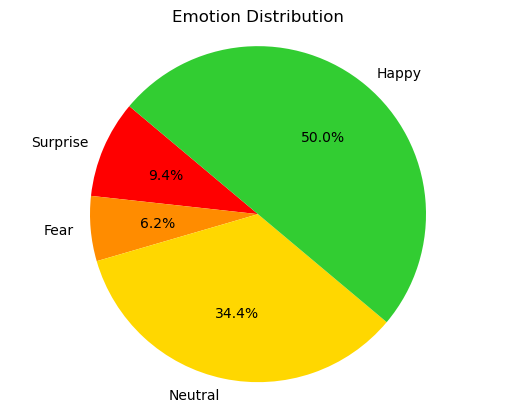

1/1 [==============================] - 0s 24ms/step


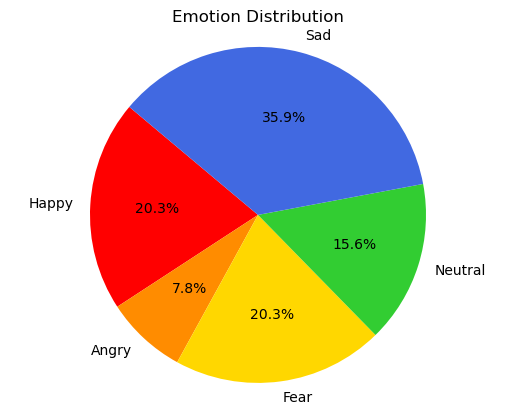

1/1 [==============================] - 0s 16ms/step


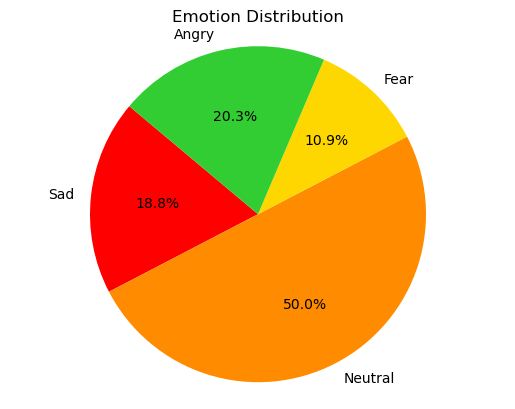

1/1 [==============================] - 0s 28ms/step


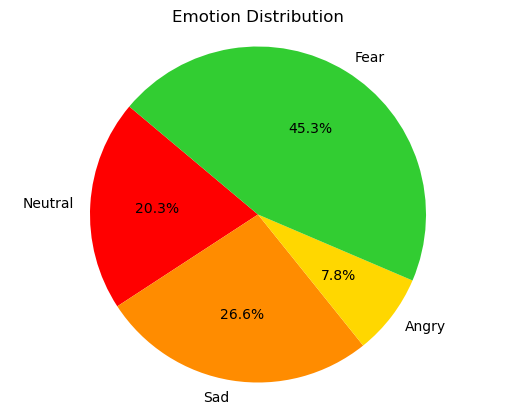

1/1 [==============================] - 0s 21ms/step


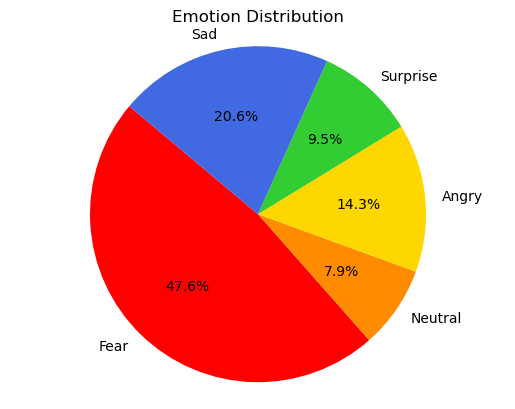

1/1 [==============================] - 0s 22ms/step


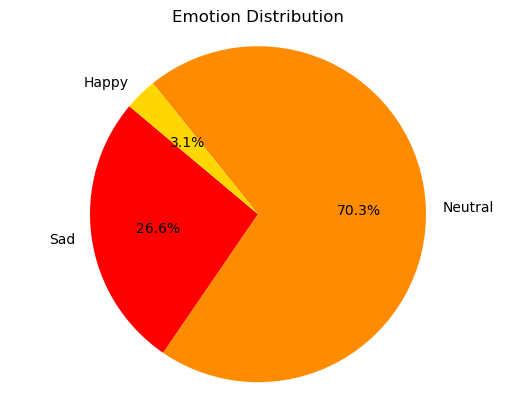

1/1 [==============================] - 0s 24ms/step


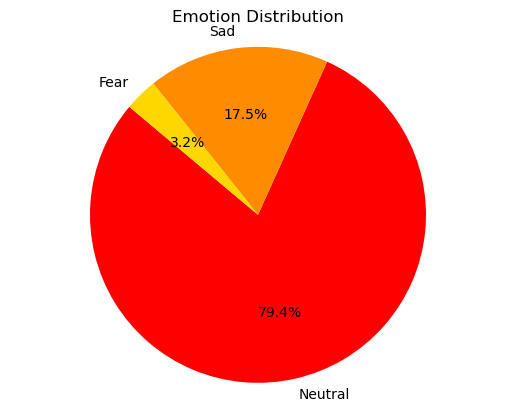

1/1 [==============================] - 0s 23ms/step


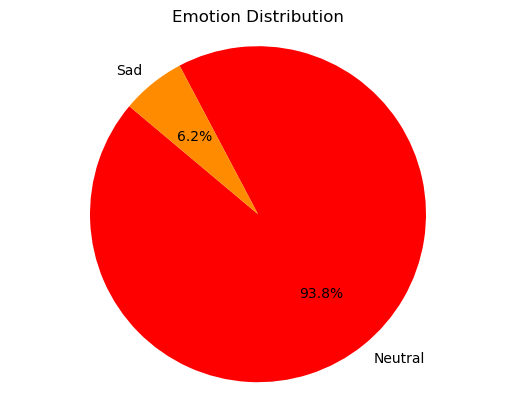

1/1 [==============================] - 0s 30ms/step


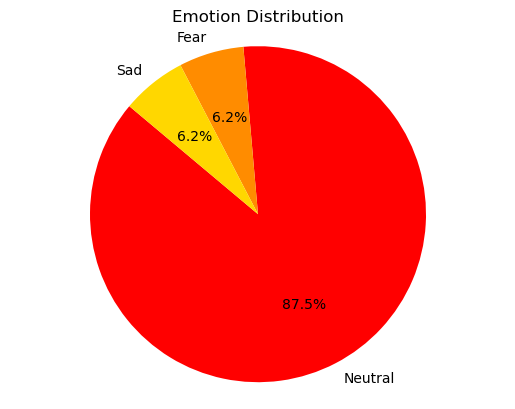

1/1 [==============================] - 0s 19ms/step


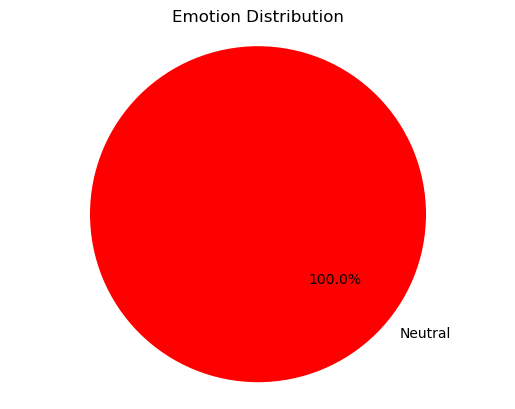

1/1 [==============================] - 0s 24ms/step


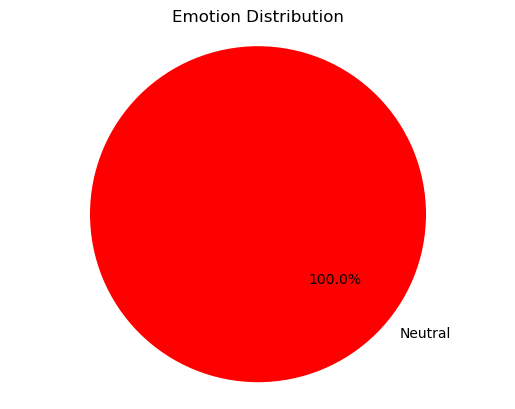

1/1 [==============================] - 0s 28ms/step


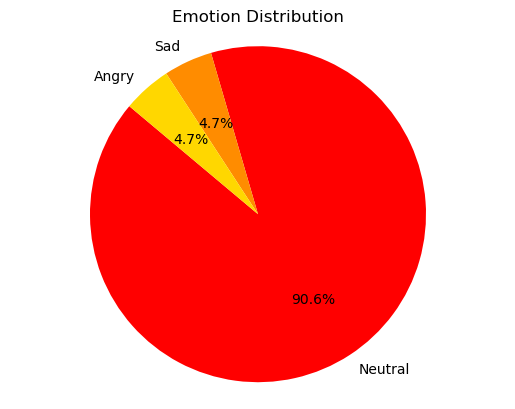

1/1 [==============================] - 0s 27ms/step


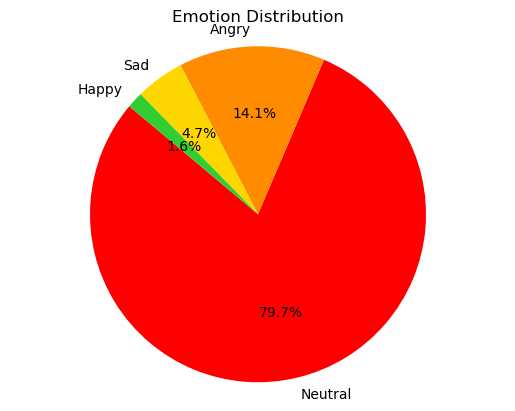

1/1 [==============================] - 0s 19ms/step


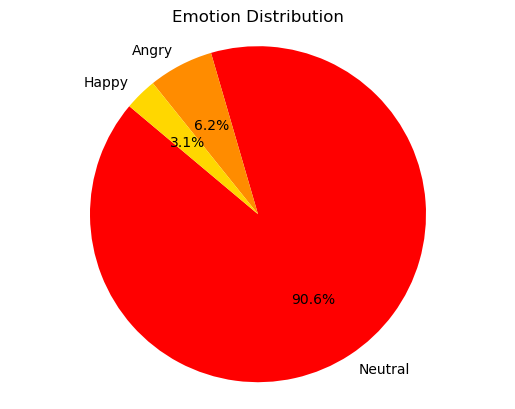

1/1 [==============================] - 0s 22ms/step


In [4]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import time
from collections import Counter
import matplotlib.pyplot as plt

emotion_model = load_model('model.h5')
emotion_model.load_weights('weights.h5')

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Create a list to store detected emotions
detected_emotions = []

# Create a list to store the majority emotions
majority_emotions = []

# Variables for emotion calculation
start_time = time.time()
emotions_window = 5  # Calculate emotions over 5 seconds
display_interval = 5  # Display the majority emotion every 5 seconds

# Flag to control text display
show_text = False

# Function to detect and recognize emotions
def detect_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

        roi = roi_gray[np.newaxis, :, :, np.newaxis]
        prediction = emotion_model.predict(roi)
        emotion = emotions[np.argmax(prediction)]

        detected_emotions.append(emotion)

        # Draw bounding boxes
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2, cv2.LINE_AA)

    return frame

# Open the webcam and run emotion detection
cap = cv2.VideoCapture(0)

# Create a function to plot a pie chart of emotions
def plot_pie_chart(emotion_counts):
    if not emotion_counts:
        return

    labels, counts = zip(*emotion_counts.items())
    colors = ['red', 'darkorange', 'gold', 'limegreen', 'royalblue', 'blueviolet', 'lightgray']
    plt.figure()
    plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title("Emotion Distribution")
    plt.savefig("emotion.png")
    image = cv2.imread("emotion.png")
    cv2.imshow("Pie Chart", image)
    plt.show()  # Display the pie chart in a separate window

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = detect_emotion(frame)

    current_time = time.time()
    elapsed_time = current_time - start_time

    # Display the majority emotion every 5 seconds
    if elapsed_time >= display_interval:
        # Calculate the majority emotion if there are detected emotions
        if detected_emotions:
            emotion_counts = Counter(detected_emotions)
            majority_emotion = emotion_counts.most_common(1)[0][0]

            detected_emotions = []  # Reset the emotion list
            start_time = current_time  # Reset the start time

            # Store the majority emotion
            majority_emotions.append(majority_emotion)

            # Set the flag to display text
            show_text = True

            # Plot the pie chart
            plot_pie_chart(emotion_counts)

    if show_text:
        # Display the majority emotion as text on the frame
        cv2.putText(frame, f"Majority Emotion: {majority_emotion}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv2.imshow('Emotion Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 186ms/step


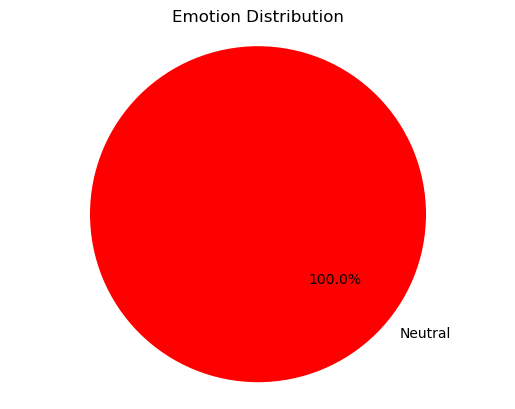

1/1 [==============================] - 0s 22ms/step


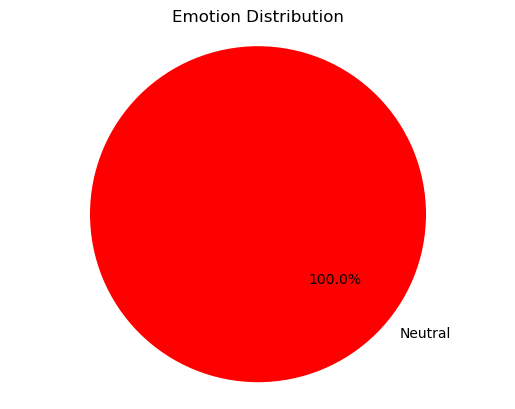

1/1 [==============================] - 0s 21ms/step


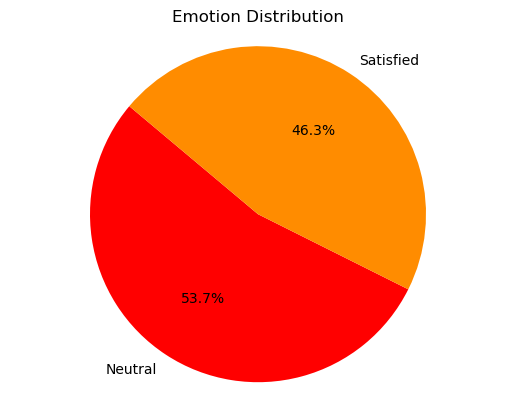

1/1 [==============================] - 0s 22ms/step


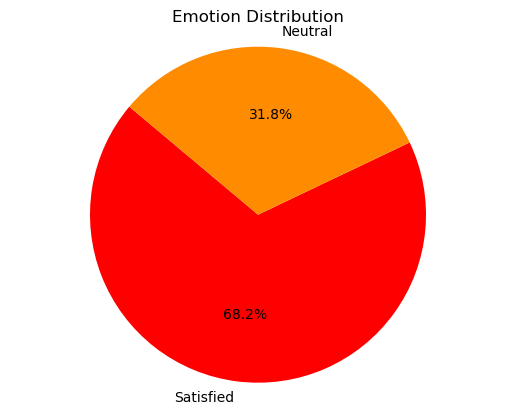

1/1 [==============================] - 0s 19ms/step


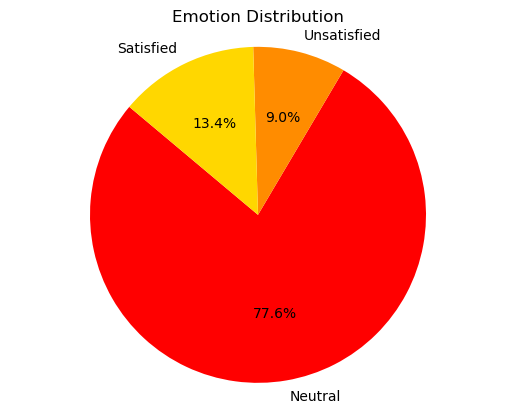

1/1 [==============================] - 0s 22ms/step


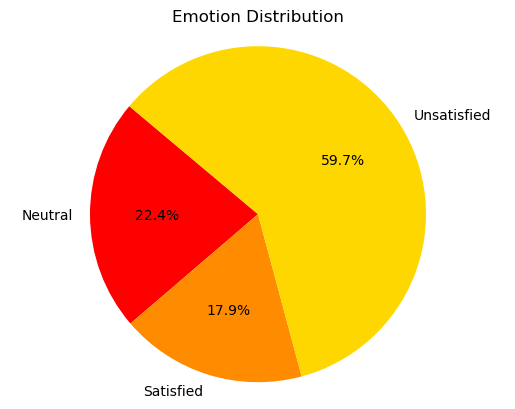

1/1 [==============================] - 0s 16ms/step


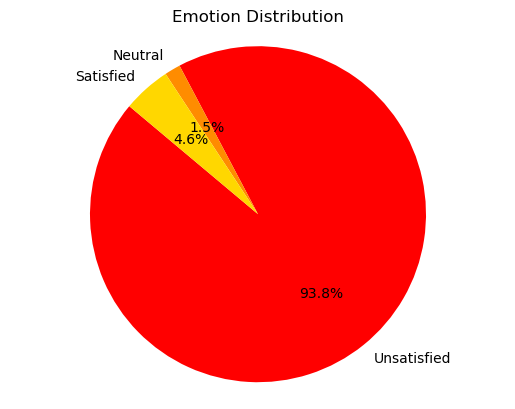

1/1 [==============================] - 0s 20ms/step


In [3]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import time
from collections import Counter
import matplotlib.pyplot as plt

emotion_model = load_model('model.h5')
emotion_model.load_weights('weights.h5')

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')

# Define emotions mapping to categories
emotion_category_mapping = {
    'Angry': 'Unsatisfied',
    'Disgust': 'Unsatisfied',
    'Fear': 'Unsatisfied',
    'Happy': 'Satisfied',
    'Sad': 'Unsatisfied',
    'Surprise': 'Satisfied',
    'Neutral': 'Neutral'
}

# Define the emotions list for mapping
emotions = list(emotion_category_mapping.keys())

# Create a list to store detected emotions
detected_emotions = []

# Create a list to store the majority emotions
majority_emotions = []

# Variables for emotion calculation
start_time = time.time()
emotions_window = 5  # Calculate emotions over 5 seconds
display_interval = 5  # Display the majority emotion every 5 seconds

# Flag to control text display
show_text = False

# Function to detect and recognize emotions
def detect_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

        roi = roi_gray[np.newaxis, :, :, np.newaxis]
        prediction = emotion_model.predict(roi)
        emotion = emotions[np.argmax(prediction)]

        detected_emotions.append(emotion_category_mapping[emotion])

        # Draw bounding boxes
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(frame, emotion_category_mapping[emotion], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2, cv2.LINE_AA)

    return frame

# Open the webcam and run emotion detection
cap = cv2.VideoCapture(0)

# Create a function to plot a pie chart of emotions
def plot_pie_chart(emotion_counts):
    if not emotion_counts:
        return

    labels, counts = zip(*emotion_counts.items())
    colors = ['red', 'darkorange', 'gold', 'limegreen', 'royalblue', 'blueviolet', 'lightgray']
    plt.figure()
    plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title("Emotion Distribution")
    plt.savefig("emotion.png")
    image = cv2.imread("emotion.png")
    cv2.imshow("Pie Chart", image)
    plt.show()  # Display the pie chart in a separate window

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = detect_emotion(frame)

    current_time = time.time()
    elapsed_time = current_time - start_time

    # Display the majority emotion every 5 seconds
    if elapsed_time >= display_interval:
        # Calculate the majority emotion if there are detected emotions
        if detected_emotions:
            emotion_counts = Counter(detected_emotions)
            majority_emotion = emotion_counts.most_common(1)[0][0]

            detected_emotions = []  # Reset the emotion list
            start_time = current_time  # Reset the start time

            # Store the majority emotion
            majority_emotions.append(majority_emotion)

            # Set the flag to display text
            show_text = True

            # Plot the pie chart
            plot_pie_chart(emotion_counts)

    if show_text:
        # Display the majority emotion category as text on the frame
        cv2.putText(frame, f"Majority Emotion: {majority_emotion}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv2.imshow('Emotion Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
